In [1]:
import numpy as np
import xgcm
from xgcm import Grid
from xhistogram.xarray import histogram
import xarray as xr
import xroms
from scipy import signal
import glob
import functions #the .py file that contains all the relevant functions
from datetime import datetime

import warnings
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean.cm as cmo
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.dates import DateFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams.update({'font.size': 16})

import warnings
warnings.filterwarnings("ignore")

In [2]:
paths = glob.glob('../../../dylan.schlichting/TXLA_Outputs/parent/2010/ocean_his_00*.nc')

ds = xroms.open_mfnetcdf(paths, 
                         chunks = {'ocean_time':1})
ds, grid = xroms.roms_dataset(ds, 
                              Vtransform = None)

xislice=slice(260,381) 
etaslice=slice(47,149)

### Calculate entrainment 

In [3]:
volhs = xr.open_mfdataset('/scratch/user/dylan.schlichting/tef/largecv/entrainment/*.nc')
volhs

<xarray.Dataset>
Dimensions:        (ocean_time: 8759, salt_bin: 500)
Coordinates:
  * ocean_time     (ocean_time) datetime64[ns] 2010-01-01T01:00:00 ... 2010-1...
  * salt_bin       (salt_bin) float64 0.04 0.12 0.2 0.28 ... 39.8 39.88 39.96
Data variables:
    dV_saltcoord   (ocean_time, salt_bin) float64 dask.array<chunksize=(8759, 500), meta=np.ndarray>
    dVs_saltcoord  (ocean_time, salt_bin) float64 dask.array<chunksize=(8759, 500), meta=np.ndarray>

(5.0, 37.0)

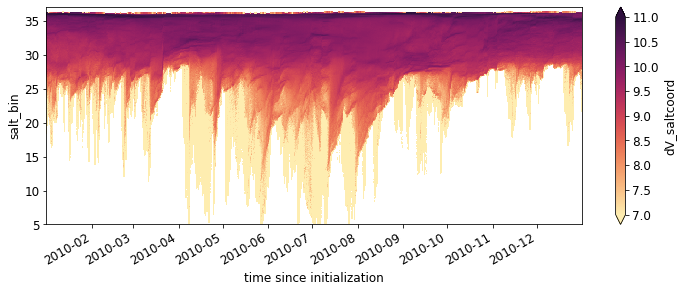

In [39]:
fig = plt.subplots(1, figsize = (12,4))
np.log10(volhs.dV_saltcoord).plot(y = 'salt_bin', cmap = cmo.matter, vmin = 7, vmax = 11)

plt.ylim(5,37)

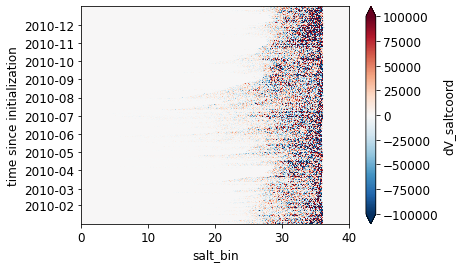

In [47]:
(volhs.dV_saltcoord.diff('ocean_time')/3600).plot(vmax = 1e5, y = )